En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [100]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [101]:
#cargamos la imagen
!wget http://farm9.staticflickr.com/8087/8482029576_14a49700d4_z.jpg

--2025-05-01 01:07:18--  http://farm9.staticflickr.com/8087/8482029576_14a49700d4_z.jpg
Resolving farm9.staticflickr.com (farm9.staticflickr.com)... 18.64.173.84, 2600:9000:2342:4a00:0:5a51:64c9:c681, 2600:9000:2342:3c00:0:5a51:64c9:c681, ...
Connecting to farm9.staticflickr.com (farm9.staticflickr.com)|18.64.173.84|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm9.staticflickr.com/8087/8482029576_14a49700d4_z.jpg [following]
--2025-05-01 01:07:18--  https://farm9.staticflickr.com/8087/8482029576_14a49700d4_z.jpg
Connecting to farm9.staticflickr.com (farm9.staticflickr.com)|18.64.173.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘8482029576_14a49700d4_z.jpg’

8482029576_14a49700     [ <=>                ]  51.02K  --.-KB/s    in 0.01s   

2025-05-01 01:07:18 (3.42 MB/s) - ‘8482029576_14a49700d4_z.jpg’ saved [52249]



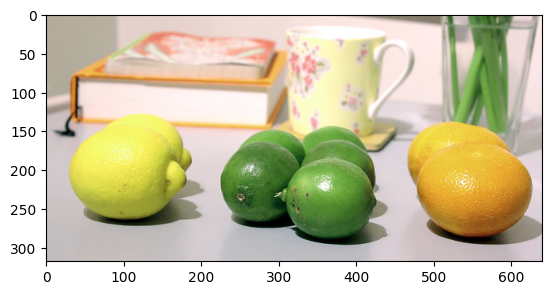

In [102]:
#elegimos esta imagen porque nos gusto la combinacion de colores y el contraste entre las frutas
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

In [103]:
K = img.copy()  # Hacer una copia de la imagen original
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)  # Convertir a HSV
Khsv[:, :, 2] = cv2.equalizeHist(Khsv[:, :, 2])  # Ecualizar el canal de brillo (V)
Knew_v= cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGR

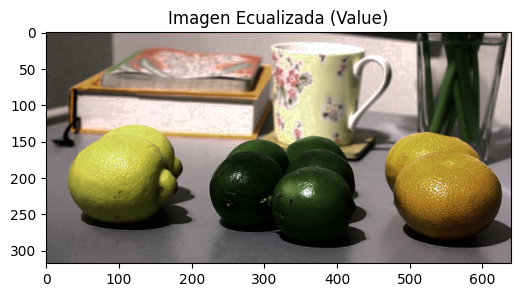

In [104]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
# plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.imshow(Knew_v)  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (Value)')  # Título
plt.show()  # Mostrar figura

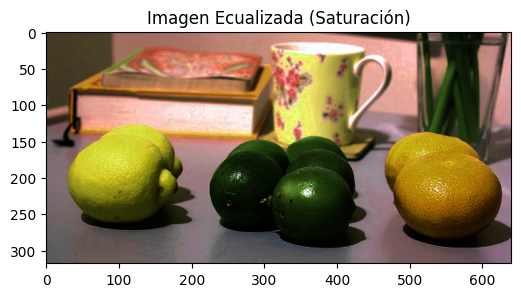

In [105]:
Khsv[:, :,1] = cv2.equalizeHist(Khsv[:, :,1])  # Ecualizar el canal de brillo (V)
Knew_s = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGR
plt.figure(figsize=(6, 9))  # Tamaño de la figura
#plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.imshow(Knew_s)  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (Saturación)')  # Título
plt.show()  # Mostrar figura

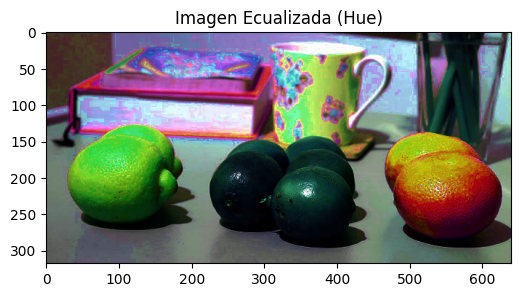

In [106]:
Khsv[:, :,0] = cv2.equalizeHist(Khsv[:, :,0])  # Ecualizar el canal de brillo (V)
Knew_h = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGR
plt.figure(figsize=(6, 9))  # Tamaño de la figura
#plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.imshow(Knew_h)  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (Hue)')  # Título
plt.show()  # Mostrar figura

Como vemos que ecualizando tanto H, S y V no hay mejoras, decidimos probar otros ajustes para ver si mejora.

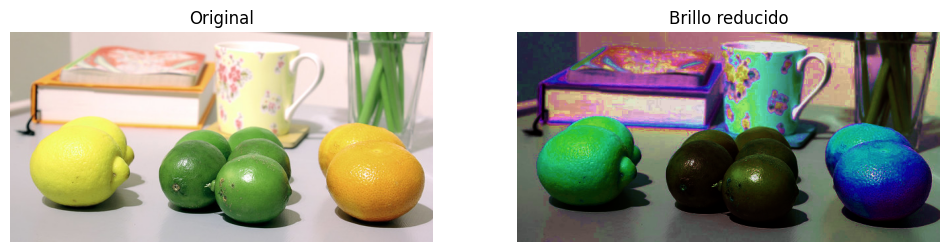

In [107]:
# Disminuir el brillo (canal V)
h, s, v = cv2.split(Khsv)
v = np.clip(v * 0.9, 0, 255).astype(np.uint8)  # Reducimos brillo al 10%, mantiene 90% del brillo original
hsv_brillo_reducido = cv2.merge((h, s, v))

# Convertir de nuevo a RGB para mostrar
img_brillo_reducido = cv2.cvtColor(hsv_brillo_reducido, cv2.COLOR_HSV2RGB)

# Mostrar comparación
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_brillo_reducido)
plt.title("Brillo reducido")
plt.axis("off")
plt.show()

Intentamos reducir el brillo pero nos queda super oscuro incluso modificando solo un n10% del brillo original.

In [108]:
def ajustar_brillo_contraste(imagen, alpha=1.1, beta=10):
    """
    alpha > 1 aumenta contraste, beta > 0 aumenta brillo
    """
    imagen_ajustada = cv2.convertScaleAbs(imagen, alpha=alpha, beta=beta)
    return imagen_ajustada

In [109]:
def correccion_gamma(imagen, gamma=1.2):
    inv_gamma = 1.0 / gamma
    tabla = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(256)]).astype("uint8")
    return cv2.LUT(imagen, tabla)

In [110]:
def aumentar_saturacion(imagen, factor=1.3):
    hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[...,1] *= factor
    hsv[...,1] = np.clip(hsv[...,1], 0, 255)
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

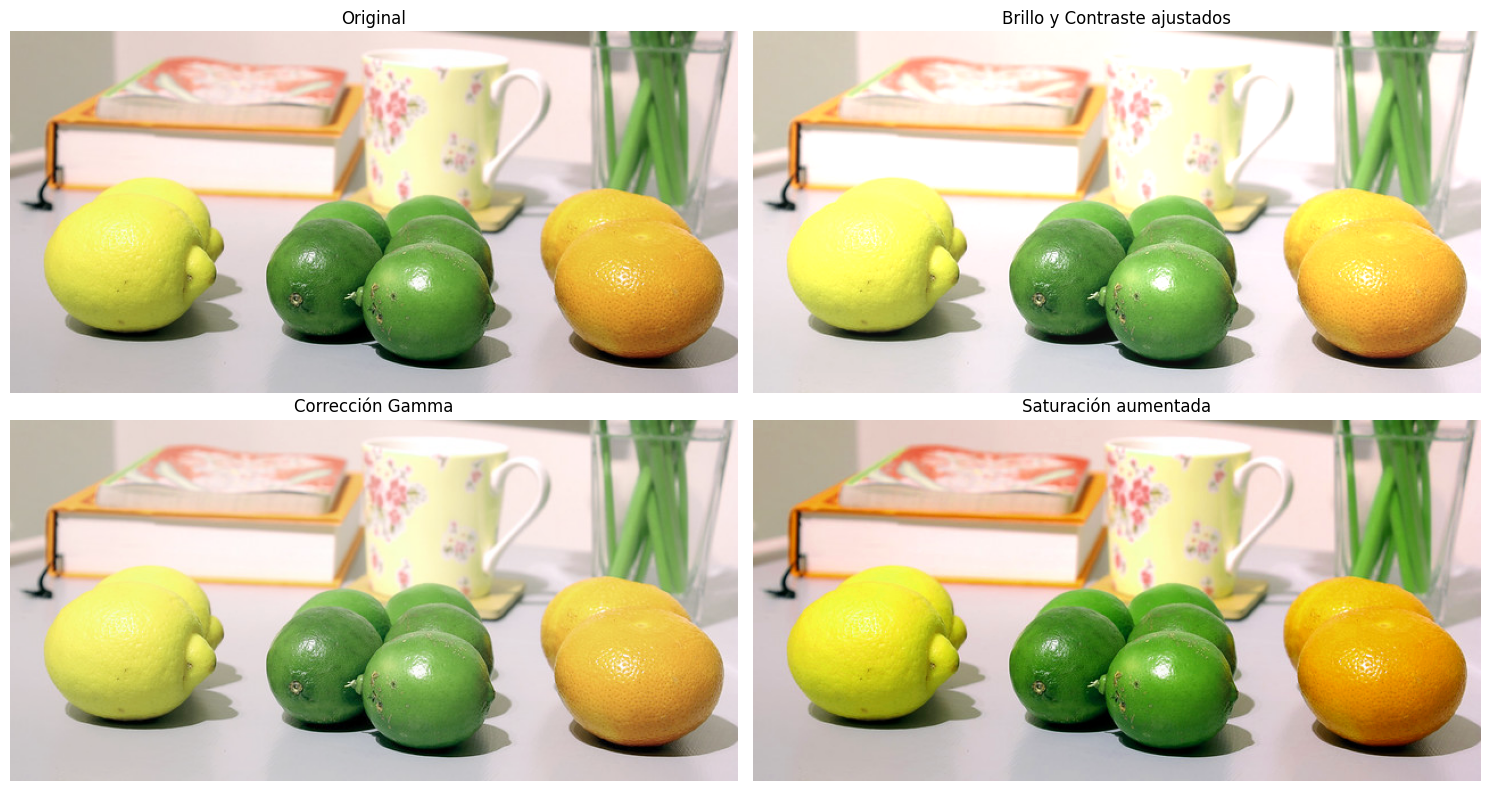

In [111]:
img_brillo = ajustar_brillo_contraste(img)
img_gamma = correccion_gamma(img, gamma=1.2)
img_saturacion = aumentar_saturacion(img)

plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(img_brillo)
plt.title("Brillo y Contraste ajustados")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(img_gamma)
plt.title("Corrección Gamma")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(img_saturacion)
plt.title("Saturación aumentada")
plt.axis("off")

plt.tight_layout()
plt.show()

Despues de realizar estos ajustes y poder verlos en conjunto, notamos que mejora la imagen original aumentando la saturacion (saturacion aumentada).

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

In [112]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [113]:
limite_inferior_verde = np.array([35, 40, 40])  # Rango inferior del color verde en HSV
limite_superior_verde = np.array([85, 255, 255])  # Rango superior del color verde en HSV

In [114]:
mascara_verde = cv2.inRange(img_hsv, limite_inferior_verde, limite_superior_verde)  # Crear una máscara para el color azul
imagen_segmentada_verde = cv2.bitwise_and(img, img, mask=mascara_verde)

Text(0.5, 1.0, 'Solo verde')

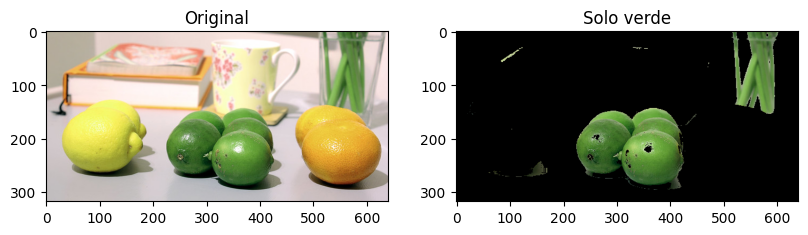

In [115]:
# Mostrar los resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(imagen_segmentada_verde, cmap='gray')
plt.title('Solo verde')

Logramos segmentar de manera correcta todo lo que aparece en la imagen de color verde.

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

In [116]:
corners = [(230, 152), # Superior izquierdo
           (220, 260), # Inferior izquierdo
           (420, 152), # Superior derecho
           (420, 280) # Inferior derecho
          ]
# for x, y in corners:
#     cv2.circle(img, (x,y), radius=0, color=(0, 255, 0), thickness=10)
# plt.imshow(img);

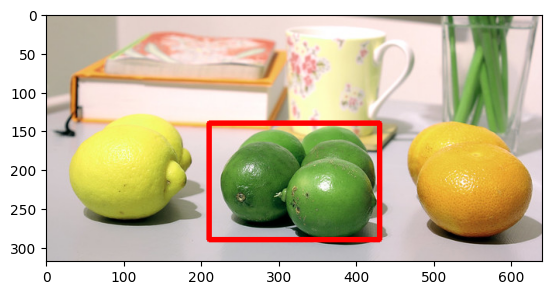

In [117]:
cv2.rectangle(img, (210, 140), (430, 290), (255, 0, 0), 5)
plt.imshow(img);

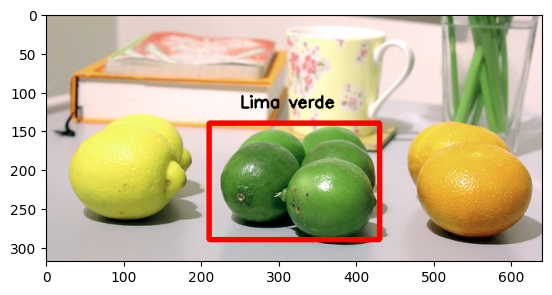

In [118]:
cv2.putText(img, "Lima verde", (250, 120),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
plt.imshow(img);

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución